In [24]:
import pandas as pd
import datetime as dt
import matplotlib.dates as mdates
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
sns.set()

In [69]:
countries = ["NO","SE","DK","FI","EE", "LV", "LT",]
abbreviations = {"NO":"Norway",
                "SE":"Sweden",
                "DK":"Denmark",
                "FI":"Finland",
                "Nordic":"Nordic countries",
                "EE":"Estonia",
                "LV":"Latvia",
                "LT":"Lithuania"}

# Electrical Power consumption in the Nordic and Baltic countries in 2014-19

Data of the daily electric power consumption in 4 continental Nordic countries (Norway (NO), Sweden (SE), Denmark (DK), Finland (FI)) and in 3 Baltic states (Estonia (EE), Latvia (LV), Lithuania (LT)) is taken from the Historical Market Data at the site of power exchange Nord Pool.
The values are in MWh.

The link: https://www.nordpoolgroup.com/historical-market-data/

## Creating the dataset

The data is saved on the site as yearly files. We download them and save into the list.

In [3]:
dailyconsumptions = []

for i in range(2014,2020):
    fileName = "Data/consumption-per-country_" + str(i) +"_daily.csv"
    data = pd.read_csv(fileName, header=2, delimiter=";")
    dailyconsumptions.append(data)
    

And then concatenate them to form a single dataset "consumptions".

In [4]:
consumptions = dailyconsumptions[0]
for j in range(1, len(dailyconsumptions)):
    consumptions = pd.concat([consumptions, dailyconsumptions[j]])


## Exploring the dataset

In [5]:
consumptions.shape

(2191, 10)

The dataset contains 2191 rows, so no day is missing; and 10 columns (consumption for 7 countries, summary for the Nordic and the Baltic, and date.

In [6]:
firstday = dt.datetime(2014,1,1)
lastday = dt.datetime(2020,1,1)
days = lastday - firstday
days

datetime.timedelta(days=2191)

In [7]:
consumptions.head(10)


,Unnamed: 0,NO,SE,FI,DK,Nordic,EE,LV,LT,Baltic
0,01.01.2014,366427,384749,222609,83837,1057638,19487,17885,22959,60331
1,02.01.2014,399918,411970,246089,99705,1157684,23373,21578,27295,72246
2,03.01.2014,394838,412474,252240,98515,1158079,24053,22123,27322,73498
3,04.01.2014,373405,390819,239997,89931,1094167,21959,20152,24993,67104
4,05.01.2014,369245,388306,229357,88121,1075031,21025,19587,24387,64999
5,06.01.2014,403916,403736,235181,106722,1149558,24258,22621,28333,75212
6,07.01.2014,390178,424245,249519,106674,1170623,24441,22707,28536,75684
7,08.01.2014,392452,429362,245834,105888,1173546,24196,22177,28314,74687
8,09.01.2014,413342,443218,247173,109110,1212848,24021,22371,28118,74510
9,10.01.2014,429543,463875,261582,106588,1261598,24591,22169,27639,74399


In [8]:
consumptions.tail(10)

,Unnamed: 0,NO,SE,FI,DK,Nordic,EE,LV,LT,Baltic
355,22.12.2019,407024,381602,221879,88327,1098844,22221,18838,31967,73026
356,23.12.2019,429045,398944,221337,93465,1142801,22716,20016,33447,54837
357,24.12.2019,420220,371505,212020,85976,1089726,21282,18268,30322,69872
358,25.12.2019,415527,377500,211261,82556,1086844,20779,17131,27782,65692
359,26.12.2019,434658,403934,216217,84816,1139629,21932,18113,29311,69356
360,27.12.2019,460167,437592,241661,93113,1232536,24133,19943,32877,76953
361,28.12.2019,442388,441166,251740,92159,1227453,23841,19371,32318,75530
362,29.12.2019,394046,396131,231863,91624,1113664,23689,18901,31866,74456
363,30.12.2019,394922,389466,229510,96420,1110331,23980,19782,33985,77747
364,31.12.2019,410930,385125,240828,89113,1128907,22758,18300,32882,74900


In [9]:
# The dataset doesn't contain any null values. So, no need to tidy it.
consumptions.isnull().values.any()

False

In [10]:
consumptions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2191 entries, 0 to 364
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2191 non-null   object
 1   NO          2191 non-null   int64 
 2   SE          2191 non-null   int64 
 3   FI          2191 non-null   int64 
 4   DK          2191 non-null   int64 
 5   Nordic      2191 non-null   int64 
 6   EE          2191 non-null   int64 
 7   LV          2191 non-null   int64 
 8   LT          2191 non-null   int64 
 9   Baltic      2191 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 188.3+ KB


The date in the dataset is object, i.e. string. We convert it into the datetime object and rename the column into "Date.

In [11]:
consumptions["Unnamed: 0"] = pd.to_datetime(consumptions["Unnamed: 0"],format = "%d.%m.%Y")

In [12]:
consumptions.dtypes


Unnamed: 0    datetime64[ns]
NO                     int64
SE                     int64
FI                     int64
DK                     int64
Nordic                 int64
EE                     int64
LV                     int64
LT                     int64
Baltic                 int64
dtype: object

In [42]:
consumptions = consumptions.rename(columns={"Unnamed: 0": "Date"})
consumptions['Year'] = pd.DatetimeIndex(consumptions['Date']).year
consumptions['Month'] = pd.DatetimeIndex(consumptions['Date']).month
consumptions.head()

,Date,NO,SE,FI,DK,Nordic,EE,LV,LT,Baltic,Year,Month
0,2014-01-01,366427,384749,222609,83837,1057638,19487,17885,22959,60331,2014,1
1,2014-01-02,399918,411970,246089,99705,1157684,23373,21578,27295,72246,2014,1
2,2014-01-03,394838,412474,252240,98515,1158079,24053,22123,27322,73498,2014,1
3,2014-01-04,373405,390819,239997,89931,1094167,21959,20152,24993,67104,2014,1
4,2014-01-05,369245,388306,229357,88121,1075031,21025,19587,24387,64999,2014,1


## CMD - Consumptions_daily

In [43]:
CMD = consumptions.set_index("Date")
CMD.head()



,NO,SE,FI,DK,Nordic,EE,LV,LT,Baltic,Year,Month
Date,,,,,,,,,,,
2014-01-01,366427,384749,222609,83837,1057638,19487,17885,22959,60331,2014,1
2014-01-02,399918,411970,246089,99705,1157684,23373,21578,27295,72246,2014,1
2014-01-03,394838,412474,252240,98515,1158079,24053,22123,27322,73498,2014,1
2014-01-04,373405,390819,239997,89931,1094167,21959,20152,24993,67104,2014,1
2014-01-05,369245,388306,229357,88121,1075031,21025,19587,24387,64999,2014,1


## CY Consumptions - Yearly

In [16]:
CY = consumptions.set_index(["Year", "Date"]) 
CY

NO      SE      FI     DK   Nordic     EE     LV     LT  \
Year Date                                                                      
2014 2014-01-01  366427  384749  222609  83837  1057638  19487  17885  22959   
     2014-01-02  399918  411970  246089  99705  1157684  23373  21578  27295   
     2014-01-03  394838  412474  252240  98515  1158079  24053  22123  27322   
     2014-01-04  373405  390819  239997  89931  1094167  21959  20152  24993   
     2014-01-05  369245  388306  229357  88121  1075031  21025  19587  24387   
...                 ...     ...     ...    ...      ...    ...    ...    ...   
2019 2019-12-27  460167  437592  241661  93113  1232536  24133  19943  32877   
     2019-12-28  442388  441166  251740  92159  1227453  23841  19371  32318   
     2019-12-29  394046  396131  231863  91624  1113664  23689  18901  31866   
     2019-12-30  394922  389466  229510  96420  1110331  23980  19782  33985   
     2019-12-31  410930  385125  240828  89113  1128907  22758  18300  32882   

                 Baltic  Month  
Year Date                       
2014 2014-01-01   60331      1  
     2014-01-02   72246      1  
     2014-01-03   73498      1  
     2014-01-04   67104      1  
     2014-01-05   64999      1  
...                 ...    ...  
2019 2019-12-27   76953     12  
     2019-12-28   75530     12  
     2019-12-29   74456     12  
     2019-12-30   77747     12  
     2019-12-31   74900     12  

[2191 rows x 10 columns]

## CY2016 - Consumpion Yearly without 2016-02-29

In [17]:
CY2016 = CY.drop(index=pd.Timestamp("2016-02-29"),level=1)

In [18]:
CY2016.loc[2016].loc["2016-02-20":"2016-03-02"]

,NO,SE,FI,DK,Nordic,EE,LV,LT,Baltic,Month
Date,,,,,,,,,,
2016-02-20,434528,455251,248032,85808,1206889,23559,20192,27036,70787,2
2016-02-21,424264,428945,242117,82586,1164592,22810,19590,25993,68393,2
2016-02-22,457191,476228,262975,95460,1275692,25740,21997,29727,77464,2
2016-02-23,459011,482265,264039,97839,1288086,24785,21912,29744,76441,2
2016-02-24,456167,485086,262832,100029,1290963,22384,22001,29895,74280,2
2016-02-25,462529,489577,261725,101972,1301466,24986,21920,29912,76818,2
2016-02-26,454288,480943,269715,97465,1287746,25154,21817,29336,76307,2
2016-02-27,434837,449688,258279,89543,1219649,22638,19252,26307,68197,2
2016-02-28,428176,448231,245553,89174,1197196,21976,18832,25682,66490,2


## Yearly patterns. Graphs

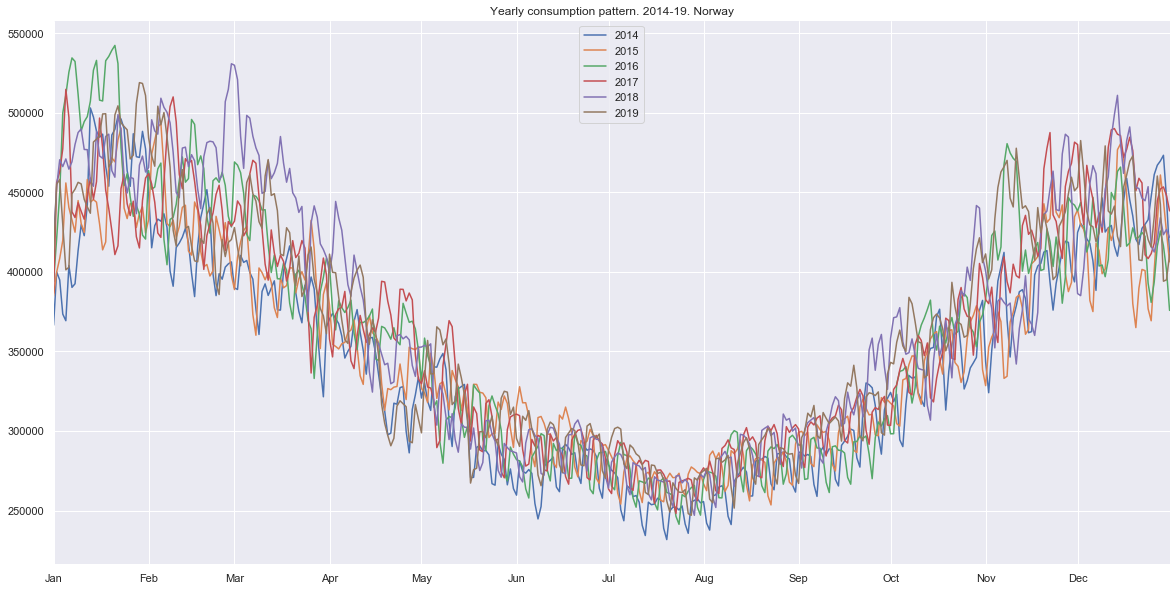

In [56]:
fig,ax = plt.subplots(figsize=(20,10))



for i in range(2014,2020):
    ax.plot(pd.date_range(start="2014-01-01",end="2014-12-31"), CY2016.loc[i]["NO"])
        
   
ax.set_title("Yearly consumption pattern. 2014-19. Norway")
ax.legend(["2014","2015","2016","2017","2018","2019"], loc = "upper center")
ax.set_xlim(pd.Timestamp('2014-01-01'), pd.Timestamp('2014-12-31'))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
for key, spine in ax.spines.items():
    spine.set_visible(False)


The result of plotting the daily consumptions is cumbersome. The plot with monthly means would be more visual.

## Yearly consumption by monthly means 

In [45]:
CMmean = CMD.resample("M").mean().round(0)
CMmean

,NO,SE,FI,DK,Nordic,EE,LV,LT,Baltic,Year,Month
Date,,,,,,,,,,,
2014-01-31,449989.0,477985.0,281437.0,106612.0,1316031.0,26726.0,23409.0,29147.0,79283.0,2014.0,1.0
2014-02-28,416771.0,443268.0,262137.0,102471.0,1224655.0,25075.0,22378.0,28338.0,75792.0,2014.0,2.0
2014-03-31,385508.0,404266.0,241778.0,94857.0,1126419.0,22702.0,20284.0,25328.0,68314.0,2014.0,3.0
2014-04-30,338718.0,362365.0,223276.0,87699.0,1011962.0,21007.0,18587.0,24924.0,64519.0,2014.0,4.0
2014-05-31,302799.0,325447.0,204573.0,84739.0,917618.0,19397.0,17635.0,24219.0,61252.0,2014.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...
2019-08-31,280719.0,298298.0,195848.0,86246.0,861115.0,19516.0,18572.0,30992.0,69080.0,2019.0,8.0
2019-09-30,310514.0,325048.0,205682.0,87685.0,928933.0,20630.0,18737.0,31685.0,71052.0,2019.0,9.0
2019-10-31,368344.0,374795.0,229224.0,93395.0,1065763.0,22951.0,19721.0,33272.0,75944.0,2019.0,10.0


In [47]:
CMmeanMI = CMmean.set_index('Year', append=True).reorder_levels(['Year', 'Date'])
CMmeanMI

NO        SE        FI        DK     Nordic       EE  \
Year   Date                                                                     
2014.0 2014-01-31  449989.0  477985.0  281437.0  106612.0  1316031.0  26726.0   
       2014-02-28  416771.0  443268.0  262137.0  102471.0  1224655.0  25075.0   
       2014-03-31  385508.0  404266.0  241778.0   94857.0  1126419.0  22702.0   
       2014-04-30  338718.0  362365.0  223276.0   87699.0  1011962.0  21007.0   
       2014-05-31  302799.0  325447.0  204573.0   84739.0   917618.0  19397.0   
...                     ...       ...       ...       ...        ...      ...   
2019.0 2019-08-31  280719.0  298298.0  195848.0   86246.0   861115.0  19516.0   
       2019-09-30  310514.0  325048.0  205682.0   87685.0   928933.0  20630.0   
       2019-10-31  368344.0  374795.0  229224.0   93395.0  1065763.0  22951.0   
       2019-11-30  435138.0  419261.0  248039.0   99347.0  1201790.0  24834.0   
       2019-12-31  436561.0  425573.0  239476.0   99007.0  1200716.0  24723.0   

                        LV       LT   Baltic  Month  
Year   Date                                          
2014.0 2014-01-31  23409.0  29147.0  79283.0    1.0  
       2014-02-28  22378.0  28338.0  75792.0    2.0  
       2014-03-31  20284.0  25328.0  68314.0    3.0  
       2014-04-30  18587.0  24924.0  64519.0    4.0  
       2014-05-31  17635.0  24219.0  61252.0    5.0  
...                    ...      ...      ...    ...  
2019.0 2019-08-31  18572.0  30992.0  69080.0    8.0  
       2019-09-30  18737.0  31685.0  71052.0    9.0  
       2019-10-31  19721.0  33272.0  75944.0   10.0  
       2019-11-30  20737.0  35070.0  80641.0   11.0  
       2019-12-31  20769.0  35101.0  79935.0   12.0  

[72 rows x 10 columns]

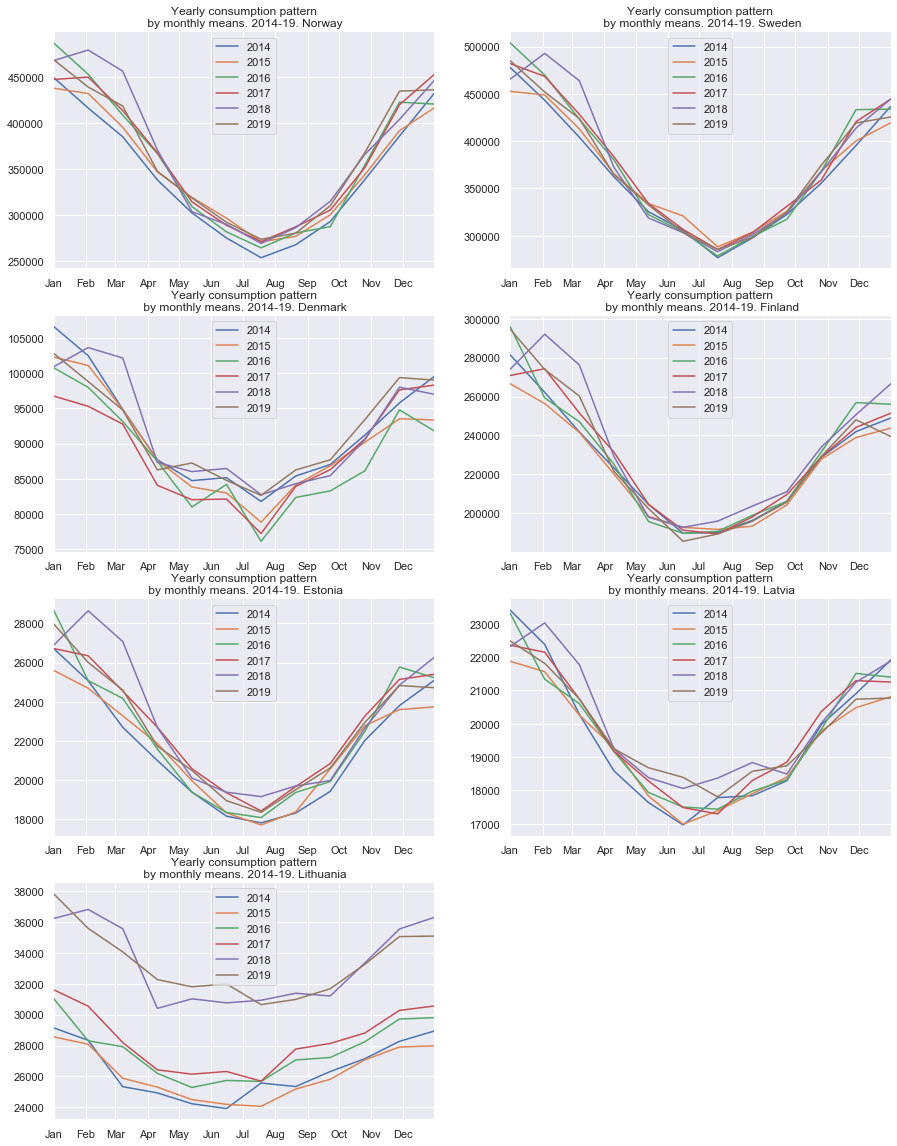

In [72]:
fig = plt.figure(figsize=(15,20))

for j in range(7):
    ax = fig.add_subplot(4,2,j+1)
    for i in range(2014,2020):
        ax.plot(pd.date_range(start="2014-01-01",end="2014-12-31", periods=12), CMmeanMI.loc[i][countries[j]])
   
    ax.set_title("Yearly consumption pattern\n by monthly means. 2014-19. " + abbreviations[countries[j]])
    ax.legend(["2014","2015","2016","2017","2018","2019"],loc = "upper center")
    #ax.set_ylim(0,500000)
    ax.set_xlim(pd.Timestamp('2014-01-01'), pd.Timestamp('2014-12-31'))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    for key, spine in ax.spines.items():
        spine.set_visible(False)

In fact, the graphs are not in one scale. They are just to show the common pattern.
We can see it clearly in all countries - the consumption is higher in winter and drops significantly in summer.

## Mean of means through the years

In [62]:
CMmeanMean = CMmean.pivot(index = "Month",
                          columns = "Year",
                          values = ["NO"])
CMmeanMean["Mean"] = CMmeanMean.mean(axis=1).round(0)
CMmeanMean

NO                                                        Mean
Year     2014.0    2015.0    2016.0    2017.0    2018.0    2019.0          
Month                                                                      
1.0    449989.0  438368.0  487631.0  447844.0  468290.0  469371.0  460249.0
2.0    416771.0  432558.0  453508.0  450420.0  479846.0  439583.0  445448.0
3.0    385508.0  395910.0  408986.0  413939.0  456847.0  418915.0  413351.0
4.0    338718.0  347419.0  367478.0  368083.0  371359.0  348097.0  356859.0
5.0    302799.0  319636.0  309682.0  314880.0  304168.0  319052.0  311703.0
6.0    275488.0  297009.0  282144.0  289314.0  290223.0  292534.0  287785.0
7.0    254073.0  271373.0  264789.0  271633.0  269623.0  274148.0  267606.0
8.0    268116.0  277293.0  280935.0  287613.0  286694.0  280719.0  280228.0
9.0    293370.0  300737.0  287835.0  305862.0  315384.0  310514.0  302284.0
10.0   338980.0  344262.0  354765.0  351920.0  366385.0  368344.0  354109.0
11.0   386266.0  392193.0  423108.0  420258.0  404347.0  435138.0  410218.0
12.0   432499.0  416801.0  421124.0  453107.0  446497.0  436561.0  434432.0

In [67]:
A = pd.DataFrame()

for land in countries:
    A[land] = CMmean.pivot(index = "Month",
                          columns = "Year",
                          values = [land]
                          ).mean(axis=1).round(0)
A

,NO,SE,DK,FI,Nordic,EE,LV,LT
Month,,,,,,,,
1.0,460249.0,477906.0,101680.0,280582.0,1315674.0,27102.0,22625.0,32413.0
2.0,445448.0,462559.0,99872.0,269662.0,1273263.0,25978.0,22042.0,31286.0
3.0,413351.0,426184.0,95409.0,253073.0,1185203.0,24400.0,20736.0,29495.0
4.0,356859.0,371528.0,86741.0,225164.0,1038695.0,21938.0,19119.0,27589.0
5.0,311703.0,327926.0,84142.0,200606.0,922242.0,19992.0,18125.0,27161.0
6.0,287785.0,307453.0,84280.0,190269.0,868803.0,18758.0,17564.0,27150.0
7.0,267606.0,282988.0,79892.0,191144.0,818998.0,18265.0,17680.0,27094.0
8.0,280228.0,300490.0,84384.0,197654.0,862370.0,19164.0,18237.0,27954.0
9.0,302284.0,324309.0,86095.0,207108.0,918988.0,20236.0,18512.0,28396.0


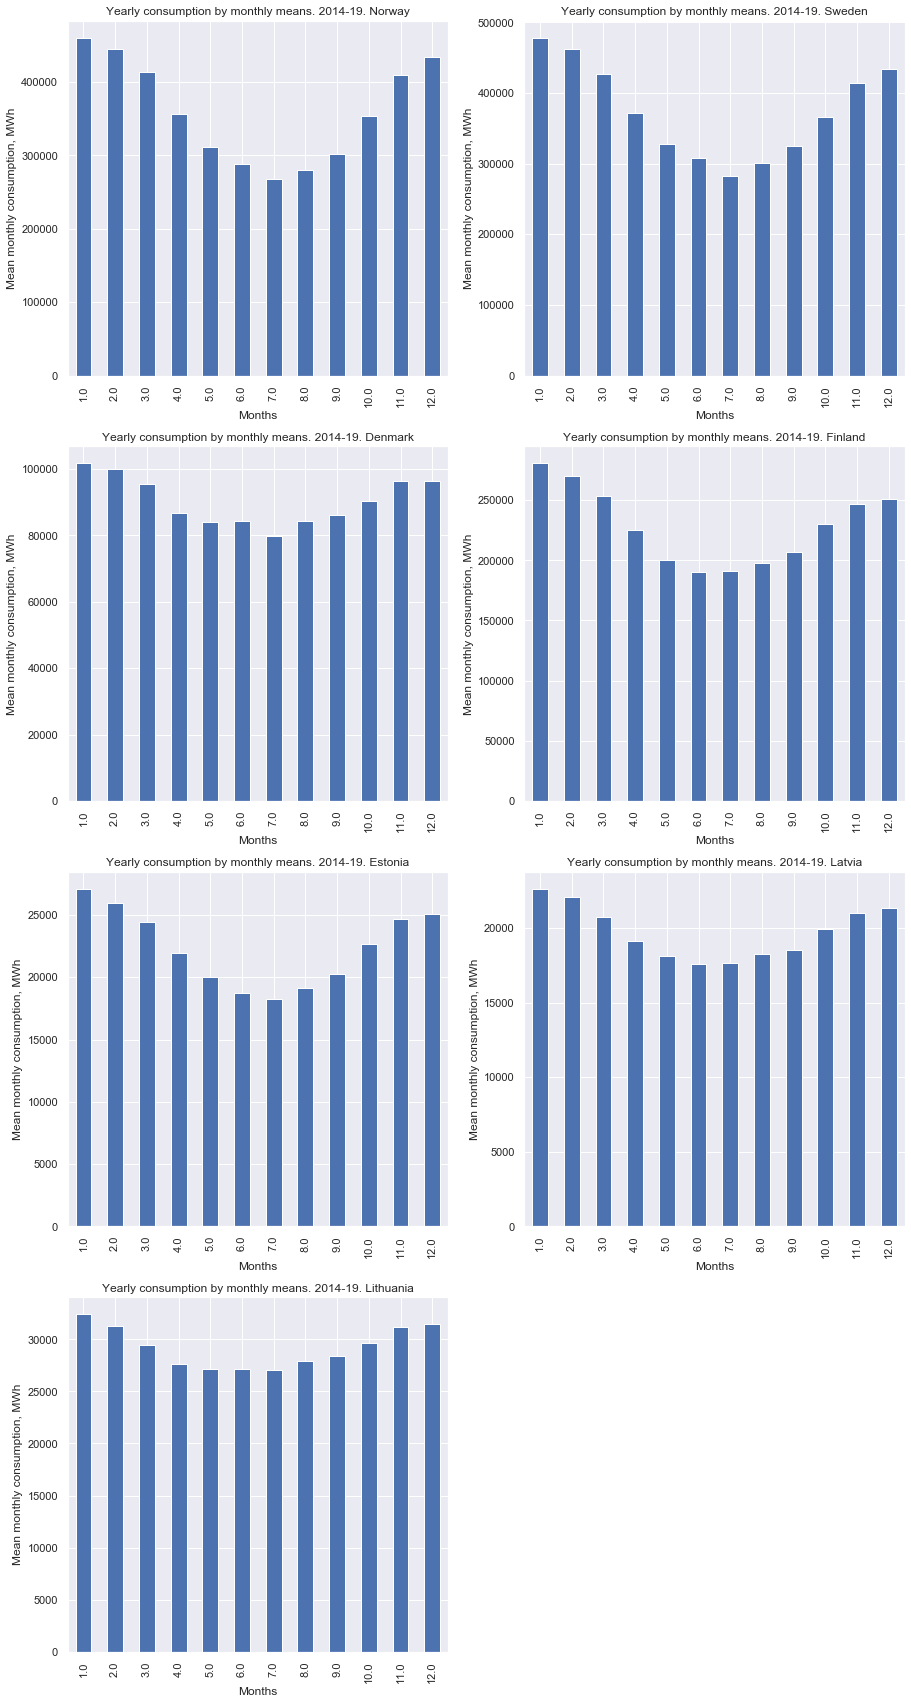

In [70]:
fig = plt.figure(figsize = (15,30))

for j in range(7):
    ax = fig.add_subplot(4,2,j+1)
   
    ax = A[countries[j]].plot(kind='bar', title ="Yearly consumption by monthly means. 2014-19. "+abbreviations[countries[j]])
    ax.set_xlabel("Months")
    ax.set_ylabel("Mean monthly consumption, MWh")
plt.show()

And in one scale.

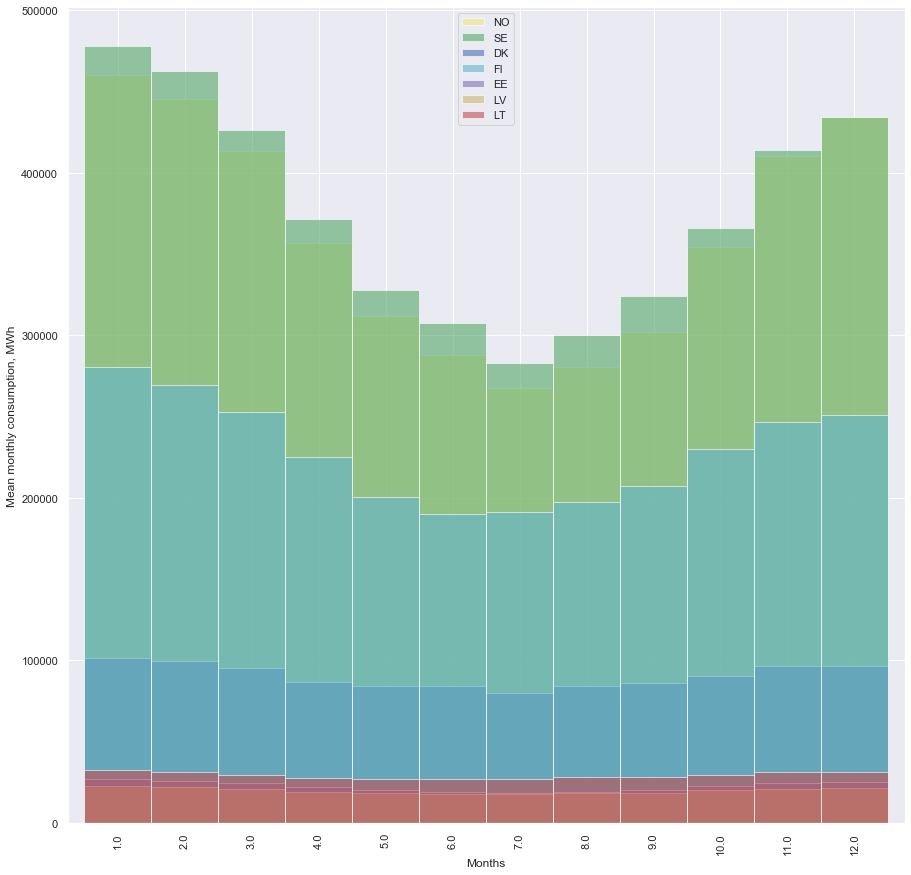

In [84]:
fig,ax = plt.subplots(figsize = (15,15))
colors = ["khaki","g","b","c","m","y","r"]

for j in range(7):
    
   
    ax = A[countries[j]].plot(kind='bar', width = 1, color=colors[j], alpha = 0.6, legend = True)
    ax.set_xlabel("Months")
    ax.set_ylabel("Mean monthly consumption, MWh")
plt.show()